In [80]:
%pip install chardet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import seaborn as sns

# Configurar opciones de visualización
%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


In [3]:
def close_columns(file_path, output_path, expected_columns, encoding='latin1'):
    try:
        with open(file_path, 'r', encoding=encoding) as file:
            lines = file.readlines()
    except UnicodeDecodeError:
        print(f"Error decoding file with {encoding} encoding. Trying 'utf-8'.")
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

    corrected_lines = []

    for line in lines:
        columns = line.strip().split('|')
        # Si el número de columnas es menor que el esperado, añade separadores
        if len(columns) < expected_columns:
            columns.extend([''] * (expected_columns - len(columns)))
        corrected_line = '|'.join(columns)
        corrected_lines.append(corrected_line)

    with open(output_path, 'w', encoding=encoding) as file:
        for line in corrected_lines:
            file.write(line + '\n')

# Especifica la ruta de tu archivo de entrada y de salida
file_path = './datasets/FT01.txt'
output_path = './datasets/FT01_FIXED.txt'
expected_columns = 37  # Cambia este número según el número esperado de columnas

# Llama a la función para corregir las columnas
close_columns(file_path, output_path, expected_columns)


In [46]:
# Lista de nombres de columnas para archivo ft01

column_names_ft01 = [
    'Tipo de documento',
    'N.º documento cedula/nit',
    'Digito de verificación',
    'Primer nombre/razón social',
    'Segundo nombre',
    'Primer apellido',
    'Segundo apellido',
    'niu',
    'Número de identificación consultas (nic)',
    'Medidor',
    'Dirección envió factura',
    'Ciudad envió factura',
    'Dirección suministro del servicio',
    'Barrio suministro',
    'Corregimiento suministro',
    'Municipio de suministro',
    'Mercado regulado- no regulado',
    'Sector urbano - rural',
    'Destino económico predio',
    'Estrato socioeconómico',
    'Número de factura',
    'Fecha inicio periodo facturado',
    'Fecha final periodo facturado',
    'Año/vigencia',
    'Periodo/mes',
    'Ciclo facturación',
    'Vencimiento factura',
    'Consumo kwh',
    'consumo subsidio kwh',
    'consunmo energia sin subsidios',
    'consumo energia con subsidios',
    'valor tarifa energia aplicada',
    'tarifa sub kwh',
    'ficha catastral',
    'correo electronico',
    'operador',
    'firma'
]

In [47]:
# Lista de nombres de columnas para archivo ft03

column_names_ft03 = [
    "identificacion_cedula_nit", 
    "digito_verificacion", 
    "niu", 
    "nic", 
    "num_factura", 
    "valor_facturado_t_esp_seg_conv_ciudadana", 
    "valor_facturado_mora", 
    "fecha_limite_pago", 
    "valor_recaudado", 
    "fecha_recaudo"
]

In [48]:
def load_dataset(file_path, delimiter='|', column_names=None):
    """
    Función para cargar un archivo txt con detección automática de codificación.
    
    :param file_path: Ruta al archivo txt.
    :param delimiter: Delimitador utilizado en el archivo txt.
    :param column_names: Lista de nombres de columnas para el DataFrame.
    :return: DataFrame cargado con el contenido del archivo txt.
    """
    try:
        # Detectar la codificación del archivo
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read())

        encoding = result['encoding']
        confidence = result['confidence']
        
        if confidence < 0.9:  # Umbral de confianza para la detección de codificación
            print(f"Advertencia: Baja confianza en la detección de codificación para {file_path}: {confidence:.2f}")

        print(f"Codificación detectada para {file_path}: {encoding}")
        
        # Leer el archivo con la codificación detectada
        if column_names:
            df = pd.read_csv(file_path, delimiter=delimiter, names=column_names, encoding=encoding)
        else:
            df = pd.read_csv(file_path, delimiter=delimiter, encoding=encoding)

        # Leer el archivo con la codificación detectada
        df = pd.read_csv(file_path, delimiter=delimiter, names=column_names, encoding=encoding)
    
    except Exception as e:
        print(f"Error al cargar el archivo {file_path}: {e}")
        df = pd.DataFrame()  # Devolver un DataFrame vacío en caso de error
    
    return df

In [49]:
# Lista de archivos a cargar
file_paths = ['./datasets/FT01_normalized.txt', './datasets/FT03.txt', './datasets/FT05.txt']

# Lista de nombres de columnas para cada archivo
column_names_list = [column_names_ft01, column_names_ft03, None]

# Cargar los archivos en una lista de DataFrames
dataframes = [load_dataset(file_path, column_names=column_names)
              for file_path, column_names in zip(file_paths, column_names_list)]

Codificación detectada para ./datasets/FT01_normalized.txt: utf-8
Codificación detectada para ./datasets/FT03.txt: ascii


C:\Users\bened\AppData\Local\Temp\ipykernel_13408\594074291.py:25: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter, names=column_names, encoding=encoding)
C:\Users\bened\AppData\Local\Temp\ipykernel_13408\594074291.py:30: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter, names=column_names, encoding=encoding)


Codificación detectada para ./datasets/FT05.txt: utf-8


In [50]:
# Se crean los dataframe
ft01_df = dataframes[0]
ft03_df = dataframes[1]
ft05_df = dataframes[2]

In [51]:
# Se accede a cada DataFrame individualmente
ft01_df.head()

,Tipo de documento,N.º documento cedula/nit,Digito de verificación,Primer nombre/razón social,Segundo nombre,Primer apellido,Segundo apellido,niu,Número de identificación consultas (nic),Medidor,...,Consumo kwh,consumo subsidio kwh,consunmo energia sin subsidios,consumo energia con subsidios,valor tarifa energia aplicada,tarifa sub kwh,ficha catastral,correo electronico,operador,firma
0,CC,1000000000,NaN,LISSET PA PACHON PEÑALOZA,NaN,NaN,NaN,332443,252209,C2AA169593,...,1.0,0.0,536.73,536.73,536.73,536.73,760010100031100350027901020091,NaN,NaN,NaN
1,CC,10000524,NaN,ALEXANDER CASTRILLON,NaN,NaN,NaN,11793177,46399136,B3PD10006071,...,65.0,0.0,34887.18,34887.18,536.73,536.73,760010100178400480001900010561,NaN,NaN,NaN
2,CC,1000064494,NaN,MIGUEL ANGEL BALTAZAR OSSA RIOS,NaN,NaN,NaN,1546387,976823,EWLP3539971,...,56.0,0.0,30056.65,30056.65,536.73,536.73,760010100229800010052800010052,NaN,NaN,NaN
3,CC,1000068878,NaN,L P VILLEGAS MEJIA S EN C,NaN,NaN,NaN,181514,128205,EWLE4447533,...,24.0,0.0,13601.27,13601.27,566.72,566.72,760010100020800180004000000004,NaN,NaN,NaN
4,CC,10001070,NaN,JHON JAIRO ARDILA CALDERON,NaN,NaN,NaN,1475003,943939,ESMN1175329,...,99.0,0.0,53135.86,53135.86,536.73,536.73,760010100198800010008901050008,NaN,NaN,NaN


In [52]:
# Verificamos y eliminamos columnas completamente en NaN
ft01_df = ft01_df.dropna(axis=1, how='all')

# Mostramos el DataFrame después de eliminar las columnas completamente en NaN
print("\nDataFrame después de eliminar columnas completamente en NaN:")
ft01_df.head()


DataFrame después de eliminar columnas completamente en NaN:


,Tipo de documento,N.º documento cedula/nit,Digito de verificación,Primer nombre/razón social,niu,Número de identificación consultas (nic),Medidor,Dirección envió factura,Ciudad envió factura,Dirección suministro del servicio,...,Ciclo facturación,Vencimiento factura,Consumo kwh,consumo subsidio kwh,consunmo energia sin subsidios,consumo energia con subsidios,valor tarifa energia aplicada,tarifa sub kwh,ficha catastral,correo electronico
0,CC,1000000000,NaN,LISSET PA PACHON PEÑALOZA,332443,252209,C2AA169593,CARRERA 8 13-47 APTO 205,76001,CR 8 13-47 LC 205,...,10,21-10-2020,1.0,0.0,536.73,536.73,536.73,536.73,760010100031100350027901020091,NaN
1,CC,10000524,NaN,ALEXANDER CASTRILLON,11793177,46399136,B3PD10006071,CR 68 13B - 61 BLQ F APTO 304,76001,CR 68 13 B-61 BL F APTO 304,...,34,28-10-2020,65.0,0.0,34887.18,34887.18,536.73,536.73,760010100178400480001900010561,NaN
2,CC,1000064494,NaN,MIGUEL ANGEL BALTAZAR OSSA RIOS,1546387,976823,EWLP3539971,K101 12A 15 52,76001,CR 101 12 ABIS-15 CASA 52,...,35,29-10-2020,56.0,0.0,30056.65,30056.65,536.73,536.73,760010100229800010052800010052,NaN
3,CC,1000068878,NaN,L P VILLEGAS MEJIA S EN C,181514,128205,EWLE4447533,A 3 N 21 54,76001,AV 3 NORTE 21-54,...,6,20-10-2020,24.0,0.0,13601.27,13601.27,566.72,566.72,760010100020800180004000000004,NaN
4,CC,10001070,NaN,JHON JAIRO ARDILA CALDERON,1475003,943939,ESMN1175329,K 61 9 90 B504,76001,CR 61 9-90 APTO B 504,...,32,27-10-2020,99.0,0.0,53135.86,53135.86,536.73,536.73,760010100198800010008901050008,NaN


In [53]:
ft03_df.head()

,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo
0,31307692,NaN,10448384,1003556,213552360,0,0,27/02/2017 23:59:59,0,28/03/2022 00:00:00
1,6403524,NaN,1447439,913438,213581994,0,0,24/02/2017 23:59:59,0,10/03/2022 00:00:00
2,14967292,NaN,1613863,995120,213619672,0,0,28/02/2017 23:59:59,0,04/03/2022 00:00:00
3,16760626,NaN,1613873,995122,213619676,0,0,28/02/2017 23:59:59,0,10/03/2022 00:00:00
4,31965111,NaN,1613838,995115,213619688,0,0,28/02/2017 23:59:59,0,10/03/2022 00:00:00


In [54]:
ft03_df = ft03_df.dropna(axis=1, how='all')

# Mostramos el DataFrame después de eliminar las columnas completamente en NaN
print("\nDataFrame después de eliminar columnas completamente en NaN:")
ft03_df.head()


DataFrame después de eliminar columnas completamente en NaN:


,identificacion_cedula_nit,digito_verificacion,niu,nic,num_factura,valor_facturado_t_esp_seg_conv_ciudadana,valor_facturado_mora,fecha_limite_pago,valor_recaudado,fecha_recaudo
0,31307692,NaN,10448384,1003556,213552360,0,0,27/02/2017 23:59:59,0,28/03/2022 00:00:00
1,6403524,NaN,1447439,913438,213581994,0,0,24/02/2017 23:59:59,0,10/03/2022 00:00:00
2,14967292,NaN,1613863,995120,213619672,0,0,28/02/2017 23:59:59,0,04/03/2022 00:00:00
3,16760626,NaN,1613873,995122,213619676,0,0,28/02/2017 23:59:59,0,10/03/2022 00:00:00
4,31965111,NaN,1613838,995115,213619688,0,0,28/02/2017 23:59:59,0,10/03/2022 00:00:00


In [55]:
ft05_df.head()

,Tipo Identificacion,Identificacion,Dig Verif,Nombre,2do Nombre,Apellido,2do Apellido,niu,Contrato(NIC),Medidor,Anio,Mes,Fecha Inicio,Fecha Fin,Factura,Saldo,Unnamed: 16
0,C�dula,SIENA434257,NaN,NN,NaN,NaN,NaN,434636,434636,FIHP_24096187,2022,8,28/06/2022,28/07/2022,343593931,"1931,83",NaN
1,C�dula,SIENA434315,NaN,NN,NaN,NaN,NaN,434733,434733,GIPP_24734704,2022,8,28/06/2022,28/07/2022,343593936,"3106,18",NaN
2,C�dula,SIENA434387,NaN,NN,NaN,NaN,NaN,434832,434832,GIPP_22991936,2022,8,28/06/2022,28/07/2022,343594061,"3875,17",NaN
3,C�dula,SIENA575181,NaN,NN,NaN,NaN,NaN,575511,575511,C2SB_50200006,2022,8,12/07/2022,10/08/2022,344137071,"2896,49",NaN
4,C�dula,SIENA1161822,NaN,NN,NaN,NaN,NaN,1162451,1162451,EWLE_4363714,2022,8,17/06/2022,15/07/2022,342797582,"2465,66",NaN


In [56]:
ft05_df = ft05_df.dropna(axis=1, how='all')

# Mostramos el DataFrame después de eliminar las columnas completamente en NaN
print("\nDataFrame después de eliminar columnas completamente en NaN:")
ft05_df.head()


DataFrame después de eliminar columnas completamente en NaN:


,Tipo Identificacion,Identificacion,Nombre,niu,Contrato(NIC),Medidor,Anio,Mes,Fecha Inicio,Fecha Fin,Factura,Saldo
0,C�dula,SIENA434257,NN,434636,434636,FIHP_24096187,2022,8,28/06/2022,28/07/2022,343593931,"1931,83"
1,C�dula,SIENA434315,NN,434733,434733,GIPP_24734704,2022,8,28/06/2022,28/07/2022,343593936,"3106,18"
2,C�dula,SIENA434387,NN,434832,434832,GIPP_22991936,2022,8,28/06/2022,28/07/2022,343594061,"3875,17"
3,C�dula,SIENA575181,NN,575511,575511,C2SB_50200006,2022,8,12/07/2022,10/08/2022,344137071,"2896,49"
4,C�dula,SIENA1161822,NN,1162451,1162451,EWLE_4363714,2022,8,17/06/2022,15/07/2022,342797582,"2465,66"


In [71]:
ft05_df.dtypes

Tipo Identificacion     object
Identificacion          object
Nombre                  object
niu                      int64
Contrato(NIC)            int64
Medidor                 object
Anio                     int16
Mes                      int64
Fecha Inicio            object
Fecha Fin               object
Factura                  int64
Saldo                  float64
dtype: object

In [61]:
ft05_df['Saldo'] = ft05_df['Saldo'].str.replace(',', '.').astype(float)

C:\Users\bened\AppData\Local\Temp\ipykernel_13408\460361956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft05_df['Saldo'] = ft05_df['Saldo'].str.replace(',', '.').astype(float)


In [67]:
ft05_df['Anio'] = pd.to_numeric(ft05_df['Anio'], downcast='integer')

C:\Users\bened\AppData\Local\Temp\ipykernel_13408\257078510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft05_df['Anio'] = pd.to_numeric(ft05_df['Anio'], downcast='integer')


In [72]:
ft05_df['Fecha Inicio'] = pd.to_datetime(ft05_df['Fecha Inicio'], format='%d/%m/%Y')

C:\Users\bened\AppData\Local\Temp\ipykernel_13408\1280794770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft05_df['Fecha Inicio'] = pd.to_datetime(ft05_df['Fecha Inicio'], format='%d/%m/%Y')


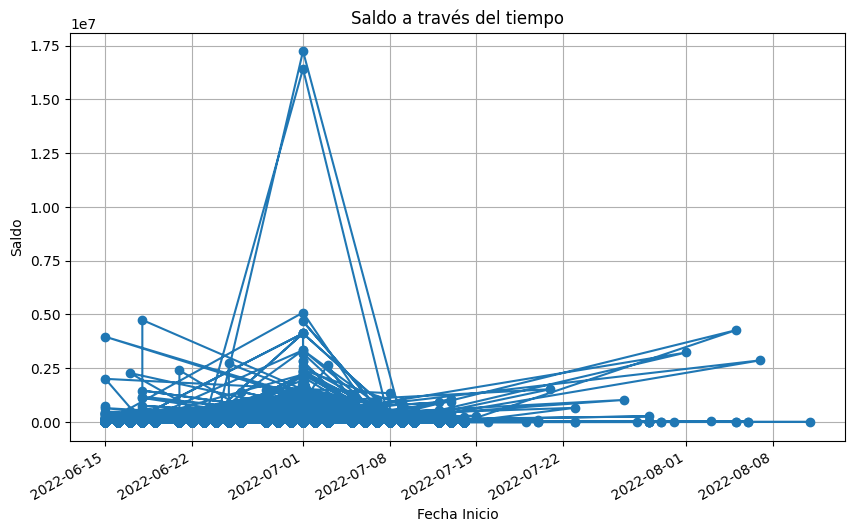

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(ft05_df['Fecha Inicio'], ft05_df['Saldo'], marker='o')

# Añadir título y etiquetas a los ejes
plt.title('Saldo a través del tiempo')
plt.xlabel('Fecha Inicio')
plt.ylabel('Saldo')

# Formatear el eje x para mostrar las fechas correctamente
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.grid(True)
plt.show()


DataFrame agregado con suma de saldo por fecha:
   Fecha Inicio                                Tipo Identificacion  \
0    2022-06-15  C�dulaC�dulaC�dulaC�dulaC�dulaC�dulaC�dulaC�du...   
1    2022-06-16  C�dulaC�dulaC�dulaC�dulaC�dulaC�dulaC�dulaC�du...   
2    2022-06-17  C�dulaC�dulaC�dulaC�dulaC�dulaC�dulaC�dulaNITC...   
3    2022-06-18  C�dulaC�dulaC�dulaC�dulaC�dulaC�dulaC�dulaC�du...   
4    2022-06-19  C�dulaC�dulaC�dulaC�dula----------------------...   
5    2022-06-21  C�dulaC�dulaNITC�dulaC�dulaC�dulaC�dulaC�dulaC...   
6    2022-06-22  NITNITNITNITNITNITNITNITNITNITNITNITNITNITNITN...   
7    2022-06-23  C�dulaNITNITNITNITNITNITNITC�dulaC�dulaC�dulaC...   
8    2022-06-24  NITNITNITNITNITNITNITNITNITNITNITNITNITNITNITN...   
9    2022-06-25  C�dulaC�dulaC�dulaNITC�dulaC�dulaC�dulaC�dulaC...   
10   2022-06-26  C�dulaNITC�dulaC�dulaC�dulaC�dulaC�dulaC�dulaC...   
11   2022-06-28  C�dulaC�dulaC�dulaC�dulaNITC�dulaC�dulaC�dulaC...   
12   2022-06-29  C�dulaC�dulaC�dulaC�dula

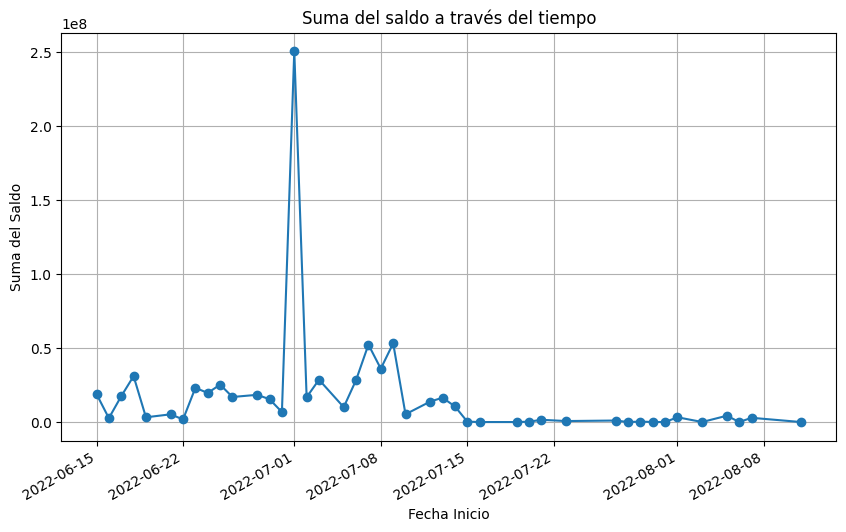

In [85]:
# Agrupar por 'Fecha Inicio' y sumar los 'Saldo'
ft05_df_agg = ft05_df.groupby('Fecha Inicio').sum().reset_index()

# Verificar el DataFrame agregado
print("\nDataFrame agregado con suma de saldo por fecha:")
print(ft05_df_agg)

# Crear el gráfico de líneas con la suma de saldo por fecha
plt.figure(figsize=(10, 6))
plt.plot(ft05_df_agg['Fecha Inicio'], ft05_df_agg['Saldo'], marker='o')

# Añadir título y etiquetas a los ejes
plt.title('Suma del saldo a través del tiempo')
plt.xlabel('Fecha Inicio')
plt.ylabel('Suma del Saldo')

# Formatear el eje x para mostrar las fechas correctamente
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [77]:
# Crear nuevas columnas para el día, mes y año
ft05_df['Día'] = ft05_df['Fecha Inicio'].dt.day
ft05_df['Mes'] = ft05_df['Fecha Inicio'].dt.month
ft05_df['Año'] = ft05_df['Fecha Inicio'].dt.year

# Verificar el DataFrame modificado
ft05_df.head()

C:\Users\bened\AppData\Local\Temp\ipykernel_13408\545042177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft05_df['Día'] = ft05_df['Fecha Inicio'].dt.day
C:\Users\bened\AppData\Local\Temp\ipykernel_13408\545042177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft05_df['Mes'] = ft05_df['Fecha Inicio'].dt.month
C:\Users\bened\AppData\Local\Temp\ipykernel_13408\545042177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Tipo Identificacion,Identificacion,Nombre,niu,Contrato(NIC),Medidor,Anio,Mes,Fecha Inicio,Fecha Fin,Factura,Saldo,Día,Año
0,C�dula,SIENA434257,NN,434636,434636,FIHP_24096187,2022,6,2022-06-28,28/07/2022,343593931,1931.83,28,2022
1,C�dula,SIENA434315,NN,434733,434733,GIPP_24734704,2022,6,2022-06-28,28/07/2022,343593936,3106.18,28,2022
2,C�dula,SIENA434387,NN,434832,434832,GIPP_22991936,2022,6,2022-06-28,28/07/2022,343594061,3875.17,28,2022
3,C�dula,SIENA575181,NN,575511,575511,C2SB_50200006,2022,7,2022-07-12,10/08/2022,344137071,2896.49,12,2022
4,C�dula,SIENA1161822,NN,1162451,1162451,EWLE_4363714,2022,6,2022-06-17,15/07/2022,342797582,2465.66,17,2022


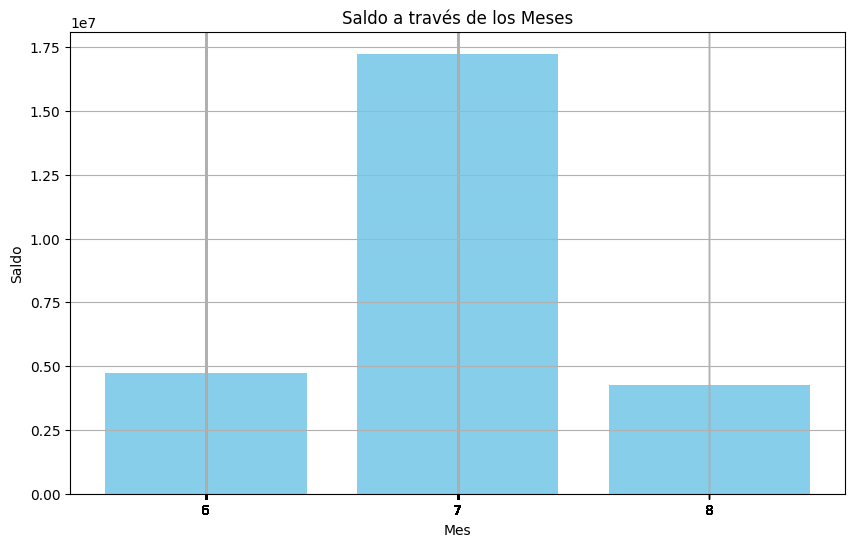

In [84]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ft05_df['Mes'], ft05_df['Saldo'], color='skyblue')

# Añadir título y etiquetas a los ejes
plt.title('Saldo a través de los Meses')
plt.xlabel('Mes')
plt.ylabel('Saldo')

# Configurar los ticks del eje x para que muestren valores enteros
plt.xticks(ft05_df['Mes'])

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [86]:
# Agrupar por 'Contrato(NIC)' y sumar los 'Saldo'
df_agg = ft05_df.groupby('Contrato(NIC)')['Saldo'].sum().reset_index()

# Ordenar por 'Saldo' en orden descendente y seleccionar los 10 primeros
top_10_contratos = df_agg.sort_values(by='Saldo', ascending=False).head(10)

# Verificar el DataFrame con el top 10 de contratos
print("\nTop 10 Contrato(NIC) con más saldo:")
print(top_10_contratos)


Top 10 Contrato(NIC) con más saldo:
       Contrato(NIC)        Saldo
48318        1450360  17241990.19
48401        1458089  16421522.44
48402        1458098   5090480.71
47370        1303662   4745307.84
53783       46446731   4681070.17
75114       47046721   4267224.00
48317        1450350   4121261.44
57667       46537438   4121261.44
48380        1451174   4121261.44
48409        1458140   4120187.76


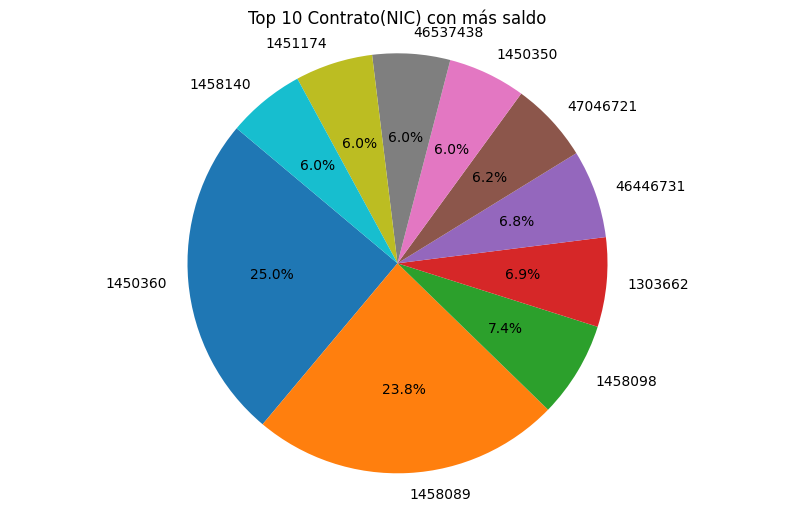

In [87]:
# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(top_10_contratos['Saldo'], labels=top_10_contratos['Contrato(NIC)'], autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Top 10 Contrato(NIC) con más saldo')

# Mostrar el gráfico
plt.axis('equal')  # Asegurar que el gráfico de torta sea circular
plt.show()

In [89]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
ft01_df.head()

,Tipo de documento,N.º documento cedula/nit,Digito de verificación,Primer nombre/razón social,niu,Número de identificación consultas (nic),Medidor,Dirección envió factura,Ciudad envió factura,Dirección suministro del servicio,Barrio suministro,Municipio de suministro,Mercado regulado- no regulado,Sector urbano - rural,Destino económico predio,Estrato socioeconómico,Número de factura,Fecha inicio periodo facturado,Fecha final periodo facturado,Año/vigencia,Periodo/mes,Ciclo facturación,Vencimiento factura,Consumo kwh,consumo subsidio kwh,consunmo energia sin subsidios,consumo energia con subsidios,valor tarifa energia aplicada,tarifa sub kwh,ficha catastral,correo electronico
0,CC,1000000000,NaN,LISSET PA PACHON PEÑALOZA,332443,252209,C2AA169593,CARRERA 8 13-47 APTO 205,76001,CR 8 13-47 LC 205,SAN PEDRO,76001,R,URBANO,COMERCIAL,99,297852432,25-08-2020,23-09-2020,2020,10,10,21-10-2020,1.0,0.0,536.73,536.73,536.73,536.73,760010100031100350027901020091,NaN
1,CC,10000524,NaN,ALEXANDER CASTRILLON,11793177,46399136,B3PD10006071,CR 68 13B - 61 BLQ F APTO 304,76001,CR 68 13 B-61 BL F APTO 304,LA HACIENDA,76001,R,URBANO,RESIDENCIAL,4,298192288,05-09-2020,02-10-2020,2020,10,34,28-10-2020,65.0,0.0,34887.18,34887.18,536.73,536.73,760010100178400480001900010561,NaN
2,CC,1000064494,NaN,MIGUEL ANGEL BALTAZAR OSSA RIOS,1546387,976823,EWLP3539971,K101 12A 15 52,76001,CR 101 12 ABIS-15 CASA 52,CIUDAD CAMPESTRE,76001,R,URBANO,RESIDENCIAL,5,298289460,05-09-2020,05-10-2020,2020,10,35,29-10-2020,56.0,0.0,30056.65,30056.65,536.73,536.73,760010100229800010052800010052,NaN
3,CC,1000068878,NaN,L P VILLEGAS MEJIA S EN C,181514,128205,EWLE4447533,A 3 N 21 54,76001,AV 3 NORTE 21-54,VERSALLES,76001,R,URBANO,RESIDENCIAL,5,297505289,21-08-2020,21-09-2020,2020,10,6,20-10-2020,24.0,0.0,13601.27,13601.27,566.72,566.72,760010100020800180004000000004,NaN
4,CC,10001070,NaN,JHON JAIRO ARDILA CALDERON,1475003,943939,ESMN1175329,K 61 9 90 B504,76001,CR 61 9-90 APTO B 504,NaN,76001,R,URBANO,RESIDENCIAL,5,298093933,03-09-2020,01-10-2020,2020,10,32,27-10-2020,99.0,0.0,53135.86,53135.86,536.73,536.73,760010100198800010008901050008,NaN


In [103]:
# Contar los valores distintos en la columna 'barrio suministro'
num_distinct_values = ft01_df['Estrato socioeconómico'].nunique()

print(f"Número de valores distintos en la columna 'Estrato socioeconómico': {num_distinct_values}")

Número de valores distintos en la columna 'Estrato socioeconómico': 4


In [94]:
# Asegurarte de que las columnas están en el formato correcto
# Si 'valor tarifa energia aplicada' está en formato de texto con comas, primero necesitas reemplazar las comas y convertir a float
ft01_df['valor tarifa energia aplicada'] = ft01_df['valor tarifa energia aplicada'].astype(float)

# Agrupar por 'Sector urbano - rural' y sumar los valores de 'valor tarifa energia aplicada'
suma_tarifa_por_sector = ft01_df.groupby('Sector urbano - rural')['valor tarifa energia aplicada'].sum().reset_index()

# Mostrar el resultado
print(suma_tarifa_por_sector)

  Sector urbano - rural  valor tarifa energia aplicada
0                 RURAL                      921654.95
1                URBANO                    95507344.26


C:\Users\bened\AppData\Local\Temp\ipykernel_13408\4169054340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft01_df['valor tarifa energia aplicada'] = ft01_df['valor tarifa energia aplicada'].astype(float)


C:\Users\bened\AppData\Local\Temp\ipykernel_13408\2636953119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sector urbano - rural', y='valor tarifa energia aplicada', data=suma_tarifa_por_sector, palette='viridis')


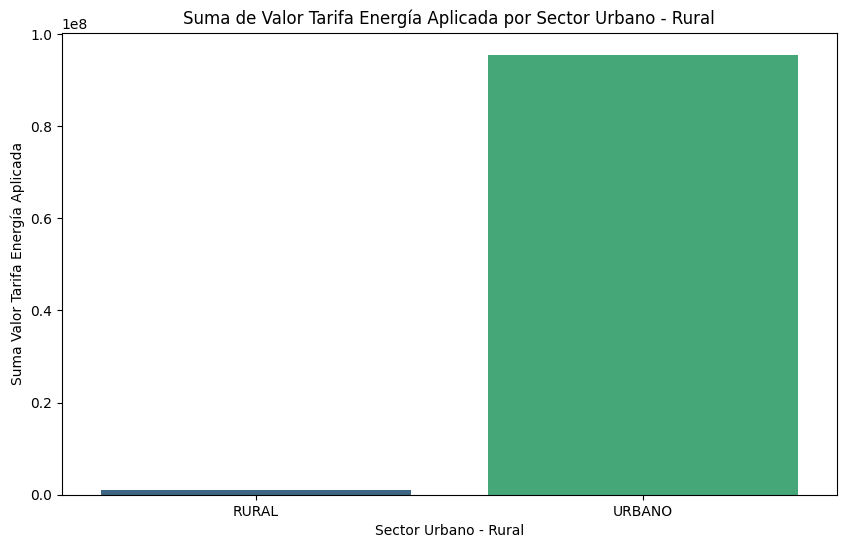

In [95]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector urbano - rural', y='valor tarifa energia aplicada', data=suma_tarifa_por_sector, palette='viridis')

# Añadir título y etiquetas a los ejes
plt.title('Suma de Valor Tarifa Energía Aplicada por Sector Urbano - Rural')
plt.xlabel('Sector Urbano - Rural')
plt.ylabel('Suma Valor Tarifa Energía Aplicada')

# Mostrar el gráfico
plt.show()

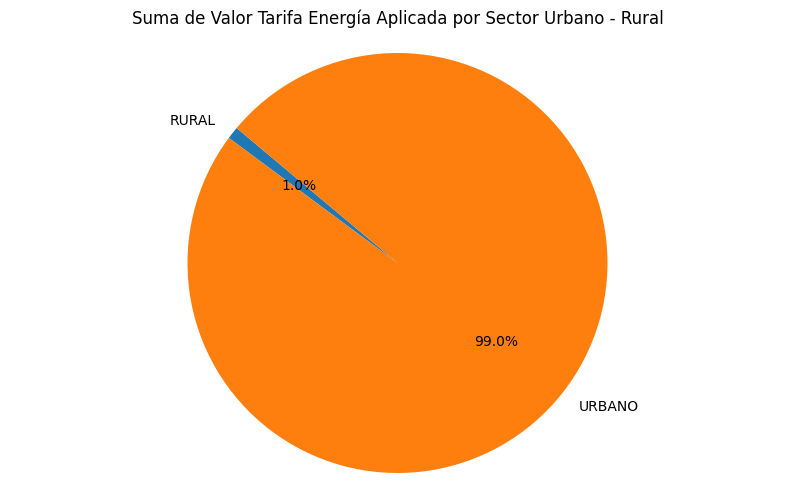

In [96]:
# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(suma_tarifa_por_sector['valor tarifa energia aplicada'], labels=suma_tarifa_por_sector['Sector urbano - rural'], autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Suma de Valor Tarifa Energía Aplicada por Sector Urbano - Rural')

# Mostrar el gráfico
plt.axis('equal')  # Asegurar que el gráfico de torta sea circular
plt.show()

In [97]:
# Agrupar por 'Sector urbano - rural' y sumar los valores de 'valor tarifa energia aplicada'
suma_Consumokwh_por_sector = ft01_df.groupby('Sector urbano - rural')['Consumo kwh'].sum().reset_index()

# Mostrar el resultado
print(suma_Consumokwh_por_sector)

  Sector urbano - rural  Consumo kwh
0                 RURAL   1683216.82
1                URBANO  77944735.09


C:\Users\bened\AppData\Local\Temp\ipykernel_13408\2231831093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sector urbano - rural', y='Consumo kwh', data=suma_Consumokwh_por_sector, palette='viridis')


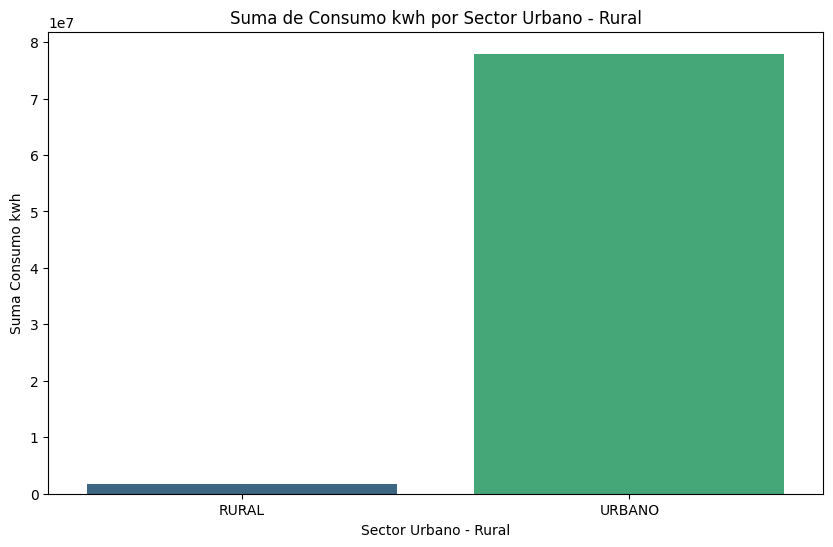

In [99]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector urbano - rural', y='Consumo kwh', data=suma_Consumokwh_por_sector, palette='viridis')

# Añadir título y etiquetas a los ejes
plt.title('Suma de Consumo kwh por Sector Urbano - Rural')
plt.xlabel('Sector Urbano - Rural')
plt.ylabel('Suma Consumo kwh')

# Mostrar el gráfico
plt.show()

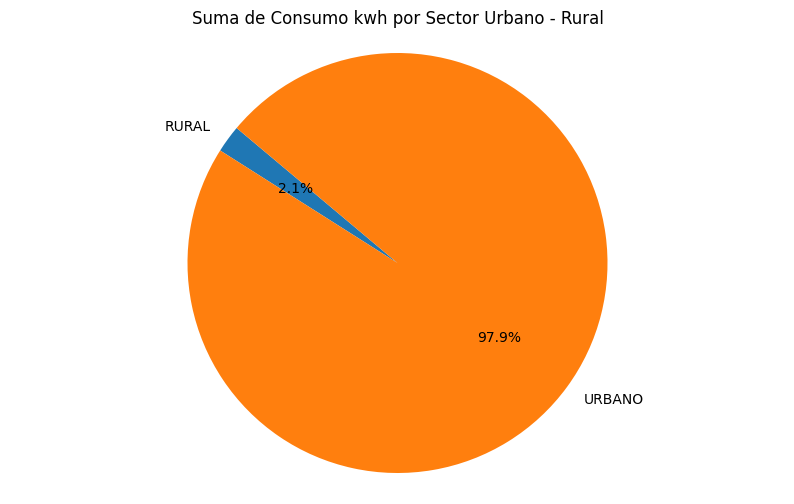

In [100]:
# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(suma_Consumokwh_por_sector['Consumo kwh'], labels=suma_tarifa_por_sector['Sector urbano - rural'], autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Suma de Consumo kwh por Sector Urbano - Rural')

# Mostrar el gráfico
plt.axis('equal')  # Asegurar que el gráfico de torta sea circular
plt.show()

In [104]:
# Agrupar por 'Estrato socioeconómico' y sumar los valores de 'Consumo kwh'
suma_consumo_por_estrato = ft01_df.groupby('Estrato socioeconómico')['Consumo kwh'].sum().reset_index()

# Mostrar el resultado
print(suma_consumo_por_estrato)

   Estrato socioeconómico  Consumo kwh
0                       4  13181458.14
1                       5   9542897.34
2                       6   8046332.50
3                      99  48857263.93


C:\Users\bened\AppData\Local\Temp\ipykernel_13408\3025779146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estrato socioeconómico', y='Consumo kwh', data=suma_consumo_por_estrato, palette='viridis')


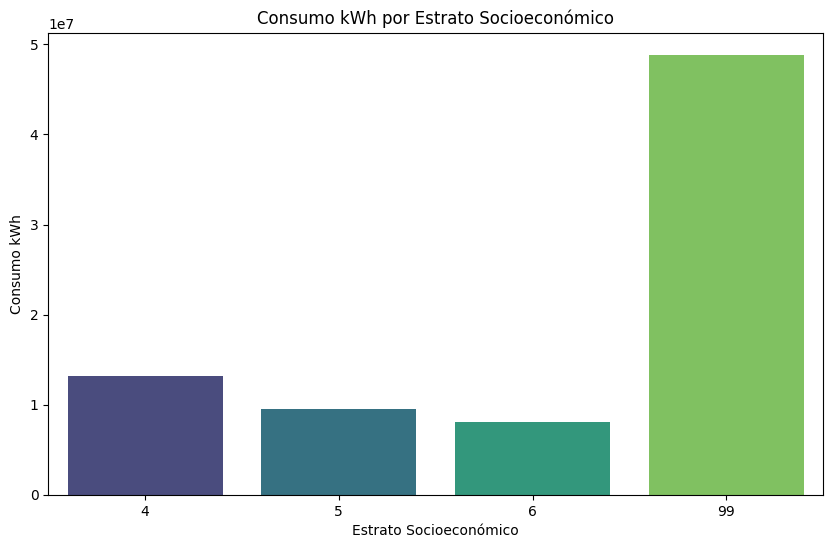

In [105]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Estrato socioeconómico', y='Consumo kwh', data=suma_consumo_por_estrato, palette='viridis')

# Añadir título y etiquetas a los ejes
plt.title('Consumo kWh por Estrato Socioeconómico')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Consumo kWh')

# Mostrar el gráfico
plt.show()

In [106]:
# Agrupar por 'Estrato socioeconómico' y sumar los valores de 'Consumo kwh'
suma_consumo_por_estrato = ft01_df.groupby('Estrato socioeconómico')['valor tarifa energia aplicada'].sum().reset_index()

# Mostrar el resultado
print(suma_consumo_por_estrato)

   Estrato socioeconómico  valor tarifa energia aplicada
0                       4                    38907831.03
1                       5                    25204630.68
2                       6                     9501173.62
3                      99                    22815363.88


C:\Users\bened\AppData\Local\Temp\ipykernel_13408\1228627698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estrato socioeconómico', y='valor tarifa energia aplicada', data=suma_consumo_por_estrato, palette='viridis')


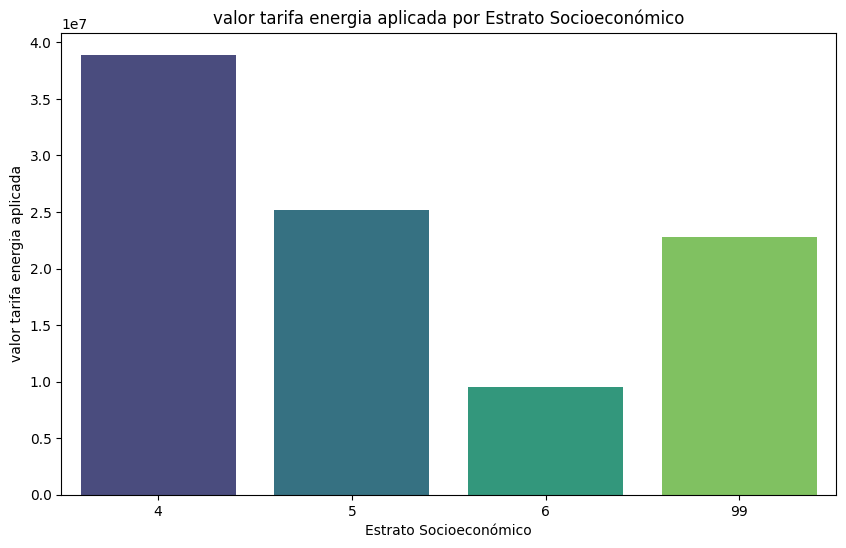

In [107]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Estrato socioeconómico', y='valor tarifa energia aplicada', data=suma_consumo_por_estrato, palette='viridis')

# Añadir título y etiquetas a los ejes
plt.title('valor tarifa energia aplicada por Estrato Socioeconómico')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('valor tarifa energia aplicada')

# Mostrar el gráfico
plt.show()